In [31]:
import numpy as np
import pandas as pd
import scipy
import random
from scipy.stats import norm
from pandas_datareader import data as wb
import matplotlib.pyplot as plt


np.random.seed(2019)
N = 100
rng = pd.date_range('2019-01-01', freq='MS', periods=N)
df = pd.DataFrame([random.randint(10, 50) for i in range(N)], columns=['temp'], index=rng)
df

,temp
2019-01-01,39
2019-02-01,46
2019-03-01,27
2019-04-01,40
2019-05-01,44
...,...
2026-12-01,27
2027-01-01,21
2027-02-01,45
2027-03-01,32


In [61]:
import yfinance as yf
yf.pdr_override()
import datetime
from datetime import datetime
from pandas_datareader import data as pdr

stocks = ['ORCL']
ls_key = 'Adj Close'
start = datetime(2014,1,1)
end = datetime(2014,3,28)
df =  pd.DataFrame(pdr.get_data_yahoo( 'MSFT',start,end)['Adj Close'])
df

[*********************100%***********************]  1 of 1 completed


,Adj Close
Date,
2014-01-02,31.420713
2014-01-03,31.209326
2014-01-06,30.549793
2014-01-07,30.786547
2014-01-08,30.236940
2014-01-09,30.042463
2014-01-10,30.473698
2014-01-13,29.577419
2014-01-14,30.253847


In [62]:
log_returns = np.log(1 + df.pct_change())
log_returns.tail()

,Adj Close
Date,
2014-03-21,-0.004224
2014-03-24,0.008430
2014-03-25,-0.003959
2014-03-26,-0.013728
2014-03-27,-0.010866


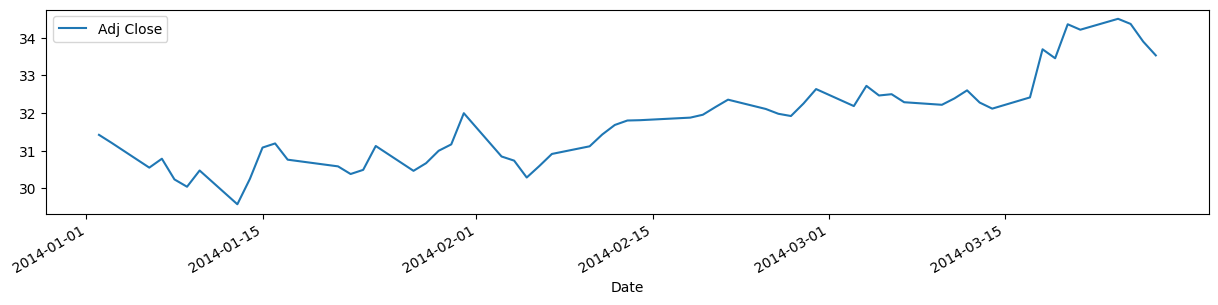

In [63]:
df.plot(figsize=(15, 3));

<Axes: xlabel='Date'>

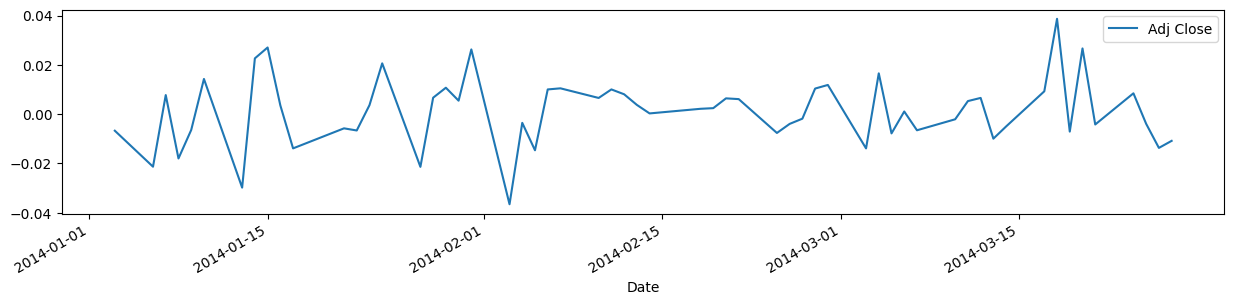

In [64]:
log_returns.plot(figsize = (15, 3))

In [65]:
def generate_forecasted_data(df, period, number_of_runs):

  # Calculate the log returns
  log_returns = np.log(1 + df.pct_change())

  # Calculuate the mean
  u = log_returns.mean()

  #calculate the variance
  var = log_returns.var()

  #calculate the drift
  drift = u - (0.5 * var)

  #calculate the standard deviation
  stdev = log_returns.std()

  #calculate the matrix data for 10 different simulation using 5 years span
  t_intervals = period # for 5 years duration
  iterations = number_of_runs # number of simulation
  daily_load = np.exp(drift.values + stdev.values * norm.ppf(np.random.rand(t_intervals, iterations)))

  # the first value of the time series data should be last value of current time series
  S0 = df.iloc[-1]
  # print(S0)

  # generate a zeroes matrix
  volume_list = np.zeros_like(daily_load)

  # assign the first value fr all 10 series as last value of current  time series
  volume_list[0] = S0
  # print(volume_list[0])
  for t in range(1, t_intervals):
    # print(t)
    # print(volume_list[t])
    # print(volume_list[t-1])
    volume_list[t] = volume_list[t - 1] * daily_load[t]
  return (volume_list)

In [66]:
simulated_data=generate_forecasted_data(df,1825,5)
simulated_data

array([[ 33.53049469,  33.53049469,  33.53049469,  33.53049469,
         33.53049469],
       [ 33.31804141,  33.81524349,  34.18159578,  34.12509093,
         33.45285512],
       [ 33.29635153,  33.55634428,  33.74878208,  34.74990902,
         33.00141134],
       ...,
       [ 85.72591364, 253.01006315, 160.23432441, 444.99634607,
        143.74466047],
       [ 87.7084724 , 257.10760163, 158.15683986, 449.79714916,
        143.58177511],
       [ 86.91601265, 255.26402334, 160.40525043, 447.33210956,
        143.24435186]])

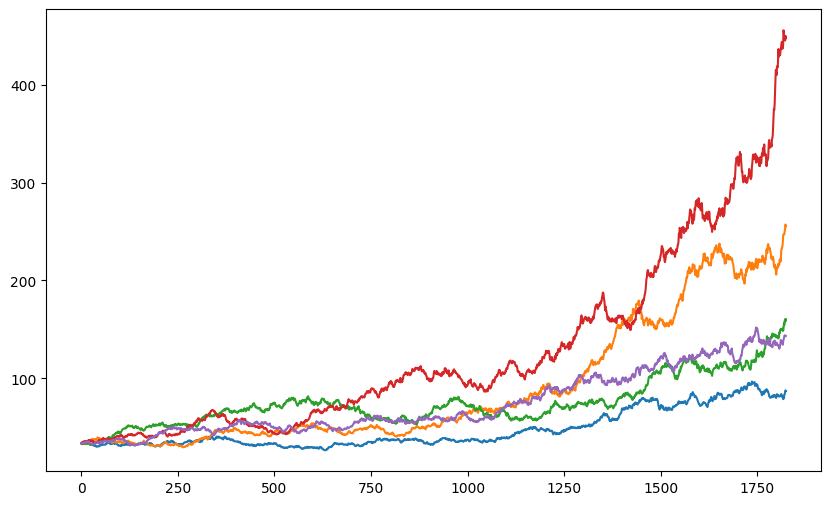

In [67]:
plt.figure(figsize=(10,6))
plt.plot(simulated_data);

## Running above function for sales data

In [75]:
df=pd.read_csv("/content/sales_data_sample.csv", sep=",", encoding='Latin-1')
df

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,10350,20,100.00,15,2244.40,12/2/2004 0:00,Shipped,4,12,2004,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Small
2819,10373,29,100.00,1,3978.51,1/31/2005 0:00,Shipped,1,1,2005,...,Torikatu 38,NaN,Oulu,NaN,90110,Finland,EMEA,Koskitalo,Pirkko,Medium
2820,10386,43,100.00,4,5417.57,3/1/2005 0:00,Resolved,1,3,2005,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Medium
2821,10397,34,62.24,1,2116.16,3/28/2005 0:00,Shipped,1,3,2005,...,1 rue Alsace-Lorraine,NaN,Toulouse,NaN,31000,France,EMEA,Roulet,Annette,Small


In [84]:
df_order=pd.DataFrame(df[['ORDERDATE','QUANTITYORDERED']]).set_index('ORDERDATE')
df_order['QUANTITYORDERED']=df_order['QUANTITYORDERED'].astype('int64')
df_order

,QUANTITYORDERED
ORDERDATE,
2/24/2003 0:00,30
5/7/2003 0:00,34
7/1/2003 0:00,41
8/25/2003 0:00,45
10/10/2003 0:00,49
...,...
12/2/2004 0:00,20
1/31/2005 0:00,29
3/1/2005 0:00,43


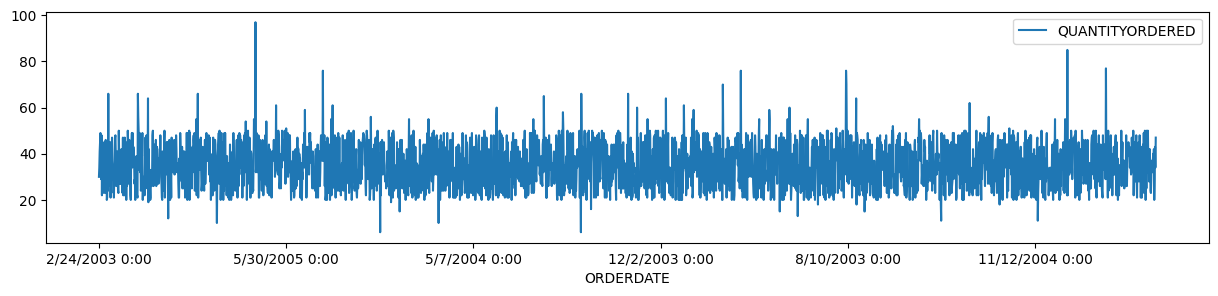

In [88]:
df_order.plot(figsize=(15, 3));

In [92]:
simulated_order=generate_forecasted_data(df_order,365,5)
simulated_order

array([[4.70000000e+01, 4.70000000e+01, 4.70000000e+01, 4.70000000e+01,
        4.70000000e+01],
       [3.30340673e+01, 3.47912443e+01, 4.74251497e+01, 5.34741007e+01,
        2.24064098e+01],
       [2.21491017e+01, 2.67062420e+01, 4.61369806e+01, 6.68601738e+01,
        1.76812265e+01],
       ...,
       [1.03232068e-15, 1.60486597e-09, 4.33833449e-16, 2.31624419e-19,
        3.19827866e-13],
       [1.00084521e-15, 1.37736568e-09, 3.79242580e-16, 1.56266514e-19,
        3.26681665e-13],
       [4.71960868e-16, 1.23520517e-09, 3.57379194e-16, 1.47807132e-19,
        8.05059008e-13]])

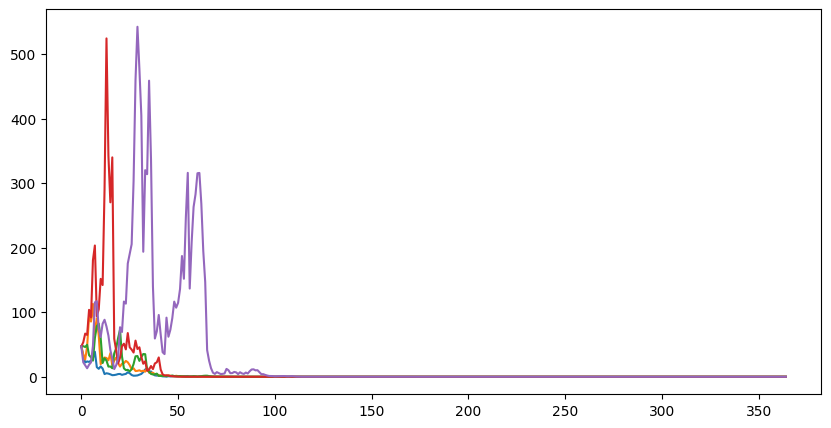

In [95]:
plt.figure(figsize=(10,5))
plt.plot(simulated_order);

In [161]:
def calculate_peak(simulated_order):
  new_list=[simulated_order[:,i] for i in range(len(simulated_order[0]))]
  new_listed=[]
  for i in new_list:
    peak=0
    index=0
    for j in range(15, len(i)):
      a=np.mean(i[:j])
      if i[j]>a and i[j]>peak:
        peak=i[j]
        index=j
    new_listed.append([peak,index])
  return new_listed

In [162]:
calculate_peak(simulated_order)

[[13.407720825208456, 34],
 [0, 0],
 [72.9281491212973, 20],
 [339.8881247224172, 16],
 [542.2269569917371, 29]]

## This gives us the peak period where the industry can see the high output in next year with thre possible date values.